## [*pyKNEEr*](https://github.com/sbonaretti/pyKNEEr) - Example #2
# [Hands-on transparent QMSKI](https://github.com/sbonaretti/2019_QMSKI_Transparent_Research_WS)
### Lake Louise, Canada - February 25, 2019
#### Serena Bonaretti

--- 

Simplified version of *pyKNEEr* workflow

### [Preprocessing](#preprocessing)
- Spatial preprocessing

### [Segmentation](#segmentation)  
- Output visualization

### [Morphology](#morphology)   
- Cartilage thickness 
- Cartilage volume

### [Relaxometry](#relaxometry)
- $T_2$ maps using EPG modeling

---

#### Imports

In [1]:
from pykneer import pykneer_io as io
from pykneer import preprocessing_for_nb as prep
from pykneer import segmentation_for_nb as segm
from pykneer import morphology_for_nb as morph
from pykneer import relaxometry_for_nb as rel
import itk
import itkwidgets
from itkwidgets import view

---

# [Preprocessing](https://sbonaretti.github.io/pyKNEEr/preprocessing.html) <a name="preprocessing"></a>

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be preprocessed 
- `nOfCores` is the number of cores used for computations (computations are parallelized for speed)
- `intensity_standardization` is a flag that determines if the intensity standardization is performed (0=no, 1=yes)

In [2]:
input_file_name           = "./image_list_preprocessing.txt"
n_of_cores                = 1
intensity_standardization = 0

#### Read image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [3]:
image_data = io.load_image_data_preprocessing(input_file_name)

01_DESS_01
01_DESS_02
-> information loaded for 2 subjects


## Spatial standardization

#### Step 0: Read the dicom images

In [4]:
prep.read_dicom_stack(image_data, n_of_cores)

-> 01_DESS_01
Size:      512   512   80
Spacing:   0.31 0.31 1.50
Origin:    13.08 -68.36 79.84
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> 01_DESS_02
Size:      512   512   80
Spacing:   0.31 0.31 1.50
Origin:    13.08 -68.36 79.84
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> Dicom images read
-> The total time was 0.49 seconds (about 0 min)


#####   Save image header
The image header of the first slice of the dicom stack is saved in a `.txt` file. This can be useful to extract information such as subject's date of birth, exam date, etc.

In [5]:
prep.print_dicom_header(image_data, n_of_cores)

-> Dicom headers written
-> The total time was 0.31 seconds (about 0 min)


#### Step 1: Change orientation to RAI 
All images are oriented to the RAI (right, anterior, inferior) orientation

In [6]:
prep.orientation_to_rai(image_data, n_of_cores)

-> Image orientation changed
-> The total time was 2.21 seconds (about 0 min)


#### Step 2: Change laterality if knee is right
Right knees are flipped to left knees to have the same laterality 

In [7]:
prep.flip_rl(image_data, n_of_cores)

-> Image laterality changed for right images
-> The total time was 0.29 seconds (about 0 min)


#### 3. Set image origin to (0,0,0)
All images are set to the origin (0,0,0). Images are saved as *_orig.mha and they are anonymized

In [8]:
prep.origin_to_zero(image_data, n_of_cores)

-> Image origin changed
-> _orig.mha images saved
-> The total time was 0.30 seconds (about 0 min)


## Visualize original image
Each row corresponds to one image. Original image after spatial preprocessing (steps 1-3)

<Figure size 576x576 with 0 Axes>

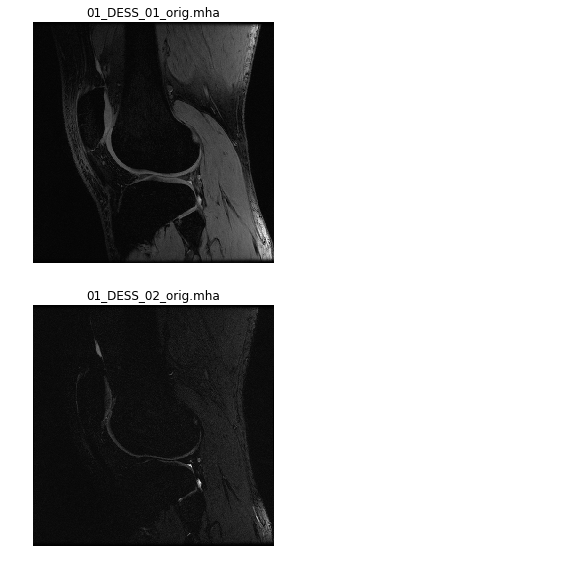

In [9]:
prep.show_preprocessed_images(image_data, intensity_standardization)

---

# [Segmentation](https://sbonaretti.github.io/pyKNEEr/segmentation.html) <a name="segmentation"></a>

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be segmented  
- `modality` can be "newsubject", "longitudinal", or "multimodal"

In [10]:
input_file_name = "./image_list_newsubject.txt"
modality        = "newsubject" # use "newsubject", "longitudinal", or "multimodal" 

#### Read image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [11]:
image_data = io.load_image_data_segmentation(modality, input_file_name)

-> image information loaded


## Visualize segmentations
Visual check of the results. For each image (row), segmentation at medial, central, and lateral compartments

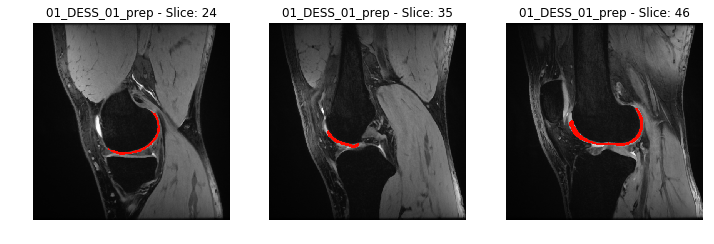

In [12]:
segm.show_segmented_images(image_data)

---

# [Morphology](https://sbonaretti.github.io/pyKNEEr/morphology.html) <a name="morphology"></a>

## Image information

Inputs:   
- `input_file_name` contains the list of femoral cartilage masks
- `thickness_algo` is the algorithm used to calculate cartilage thickness
- `output_file_name_thickness` contains the table with average and standard deviation of thickness
- `output_file_name_volume` contains the table with average volumes

In [13]:
input_file_name            = "./image_list_morphology.txt"
thickness_algo             = 1 # 1 for nearest neighbor on bone-cartilage surface 
output_file_name_thickness = "thickness.csv"
output_file_name_volume    = "volume.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [14]:
image_data = io.load_image_data_morphology(input_file_name)

-> image information loaded


## Cartilage Thickness

### Separating subcondral surface and articular surface of cartilage

To calculate cartilage thickness, first the cartilage surface is extracted from the binary mask. Then subcondral surface and articular surface are divided in two separate point clouds

In [15]:
#morph.separate_cartilage_surfaces(image_data, n_of_cores)

#### Visual check 
Subcondral bone surface (yellow) and articular surface (blue) are visualized as flattened point clouds. The flattening is with respect to a cylinder interpolated into the cartilage surface [2]

01_DESS_01_prep_fc.mha


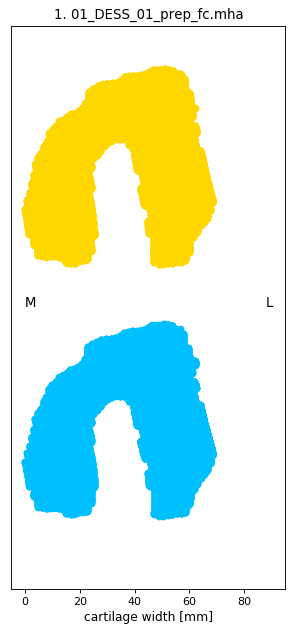

In [16]:
morph.show_cartilage_surfaces(image_data)

### Calculating cartilage thickness

Assign the chosen algorithm 

In [17]:
morph.algorithm(image_data, thickness_algo)

Calculate thickness

In [18]:
morph.calculate_thickness(image_data, n_of_cores)

01_DESS_01_prep_fc.mha
-> Thickness computed
-> The total time was 4.57 seconds (about 0 min)


### Visualizing cartilage thickness

#### MAP: Thickness is represented as a colormap on the flattened cartilage

01_DESS_01_prep_fc.mha


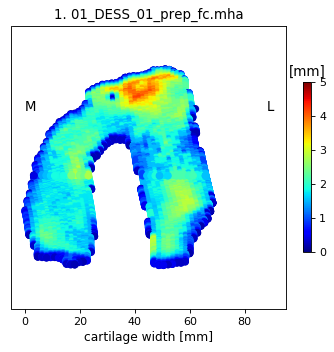

In [19]:
morph.show_thickness_maps(image_data)

#### GRAPH: Dots represent the average value of cartilage thickness per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

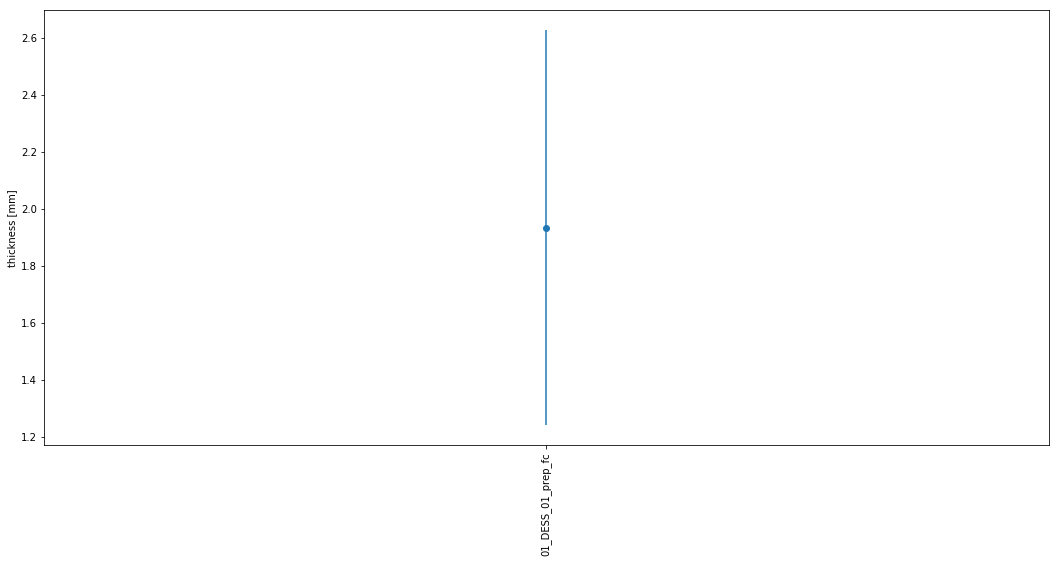

In [20]:
morph.show_thickness_graph(image_data)

#### TABLE: Average and standard deviation of cartilage thickness per image
The table is saved as a .csv file for subsequent analyisis

In [21]:
table = morph.show_thickness_table(image_data, output_file_name_thickness)
display(table)

Table saved as: thickness.csv


,Subjects,averageThickness,std.dev
1,01_DESS_01_prep_fc_thickness_1,1.93,0.69


## Cartilage Volume

Calculate cartilage volume

In [22]:
morph.calculate_volume(image_data)

01_DESS_01_prep_fc.mha
-> Volume computed


### Visualizing cartilage volume

#### GRAPH: Dots represent cartilage volume per image

<Figure size 1296x576 with 0 Axes>

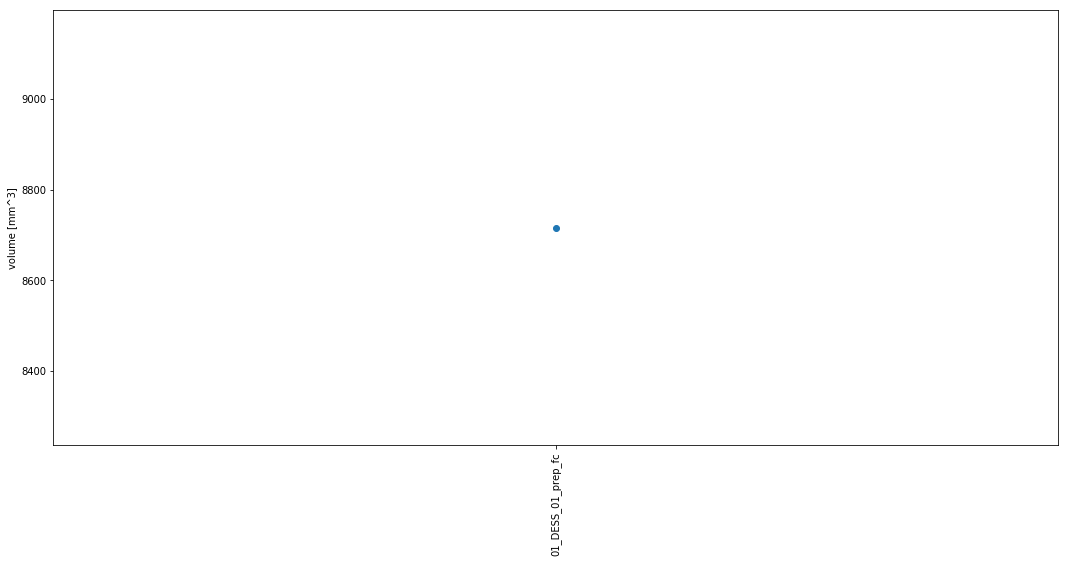

In [23]:
morph.show_volume_graph(image_data)

#### TABLE: Cartilage volume per image
The table is saved as a .csv file for subsequent analyisis

In [24]:
table = morph.show_volume_table(image_data, output_file_name_volume)
display(table)

Table saved as: volume.csv


,Subjects,Volume
1,01_DESS_01_prep_fc,8716


---

# [Relaxometry - Extended Phase Graph (EPG) modeling](https://sbonaretti.github.io/pyKNEEr/relaxometry.html)

# [Relaxometry - Exponential and linear fitting](https://sbonaretti.github.io/pyKNEEr/relaxometry.html) <a name="relaxometry"></a>

## Image information

Inputs:   
- `input_file_name` contains the list of the images used to to calculate $T_{2}$ using EPG modeling
- `output_file_name` contains average and standard deviation of the $T_{2}$ maps

In [25]:
input_file_name  = "./image_list_relaxometry_EPG.txt"
output_file_name = "EPG_demo.csv"

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [26]:
image_data = io.load_image_data_EPG(input_file_name)

01_DESS_01_orig
-> information loaded for 1 subjects


## Calculate  $T_{2}$ maps

In [27]:
rel.calculate_t2_maps(image_data, n_of_cores)

01_DESS_01_orig
-> T2 maps calculated
-> The total time was 2.02 seconds (about 0 min)


## Visualize  $T_{2}$ maps

#### 2D MAP: For each image, fitting maps at medial and lateral compartments and flattened map
The flattened map is an average of neighnoring voxels projected on the bone surface side of the femoral cartilage

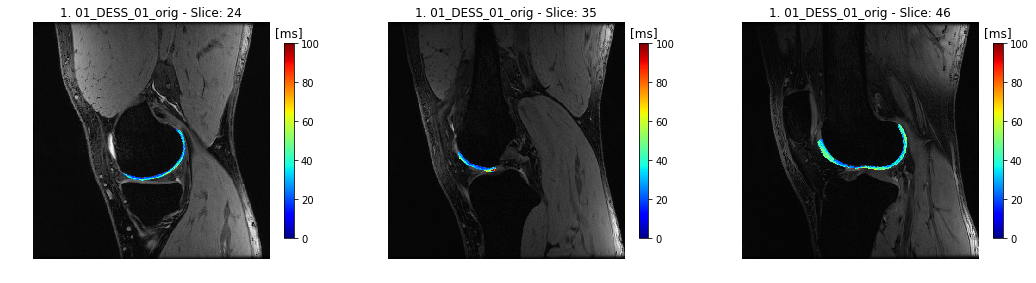

In [28]:
rel.show_t2_maps(image_data)

#### 3D MAP: Interactive rendering of $T_{2}$ maps

In [29]:
# ID of the map to visualize (The ID is the one in the 2D visualization above)
image_ID = 1 -1 # -1 because counting starts from 0

# read image
file_name = image_data[image_ID]["relaxometryFolder"] + image_data[image_ID]["t2mapMaskFileName"]
image = itk.imread(file_name)

# view
viewer = view(image, gradient_opacity=0.0, ui_collapsed=False, shadow=False)
viewer

Viewer(gradient_opacity=0.01, rendered_image=<itkImagePython.itkImageSS3; proxy of <Swig Object of type 'itkIm…

#### GRAPH: Dots represent the average value of $T_{2}$ per image; bars represents the standard deviation

<Figure size 1296x576 with 0 Axes>

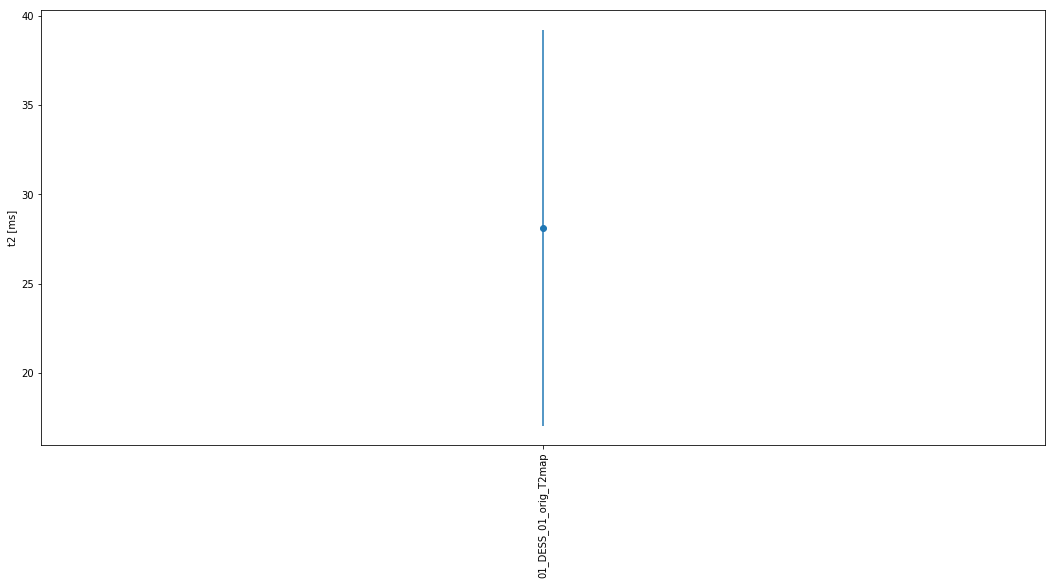

In [30]:
rel.show_t2_graph(image_data)

#### TABLE: Average and standard deviation of $T_{2}$ per image
The table is saved as a .csv file for subsequent analyisis

In [31]:
rel.show_t2_table(image_data, output_file_name)

Table saved as: EPG_demo.csv


,subjects,average,stddev
1,01_DESS_01_orig_T2map.mha,28.13,11.07


---

### Dependencies

In [32]:
%load_ext watermark
print ("elastix 4.8.0\n")
%watermark -v -m -p SimpleITK,numpy,matplotlib,multiprocessing

elastix 4.8.0

CPython 3.7.1
IPython 6.5.0

SimpleITK unknown
numpy 1.15.1
matplotlib 2.2.3
multiprocessing unknown

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
